Aim to predict conformed covid 19 cases

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/covid_19_india.csv')

In [5]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1478 non-null   int64 
 1   Date                      1478 non-null   object
 2   Time                      1478 non-null   object
 3   State/UnionTerritory      1478 non-null   object
 4   ConfirmedIndianNational   1478 non-null   object
 5   ConfirmedForeignNational  1478 non-null   object
 6   Cured                     1478 non-null   int64 
 7   Deaths                    1478 non-null   int64 
 8   Confirmed                 1478 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 104.0+ KB


In [7]:
df.shape

(1478, 9)

In [8]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#', 'Jharkhand#'],
      dtype=object)

In [9]:
df_Delhi = df.loc[df['State/UnionTerritory']=='Delhi']

In [10]:
df_Delhi.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
34,35,02/03/20,6:00 PM,Delhi,1,0,0,0,1
38,39,03/03/20,6:00 PM,Delhi,1,0,0,0,1
42,43,04/03/20,6:00 PM,Delhi,1,0,0,0,1
45,46,05/03/20,6:00 PM,Delhi,2,0,0,0,2
51,52,06/03/20,6:00 PM,Delhi,3,0,0,0,3


In [12]:
import plotly.offline as py
import plotly.graph_objs as go

In [15]:
cured_rate = go.Scatter(x=df_Delhi['Date'],y=df_Delhi['Cured'],name='Cured Rate')
death_rate =go.Scatter(x=df_Delhi['Date'],y=df_Delhi['Deaths'],name='Death Rate')
py.iplot([cured_rate,death_rate])

In [16]:
df_Delhi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 34 to 1453
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       60 non-null     int64 
 1   Date                      60 non-null     object
 2   Time                      60 non-null     object
 3   State/UnionTerritory      60 non-null     object
 4   ConfirmedIndianNational   60 non-null     object
 5   ConfirmedForeignNational  60 non-null     object
 6   Cured                     60 non-null     int64 
 7   Deaths                    60 non-null     int64 
 8   Confirmed                 60 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 6.7+ KB


In [37]:
df1 = df_Delhi[['Confirmed']]

In [38]:
df1

,Confirmed
34,1
38,1
42,1
45,2
51,3
62,3
71,3
84,4
87,4
98,5


In [39]:
df1=df1.values

In [40]:
type(df1)

numpy.ndarray

In [41]:
df1

array([[   1],
       [   1],
       [   1],
       [   2],
       [   3],
       [   3],
       [   3],
       [   4],
       [   4],
       [   5],
       [   6],
       [   6],
       [   7],
       [   7],
       [   7],
       [   8],
       [  10],
       [  12],
       [  17],
       [  26],
       [  29],
       [  29],
       [  30],
       [  31],
       [  36],
       [  36],
       [  39],
       [  49],
       [  87],
       [  97],
       [ 152],
       [ 219],
       [ 219],
       [ 445],
       [ 503],
       [ 523],
       [ 576],
       [ 576],
       [ 669],
       [ 898],
       [ 903],
       [1069],
       [1154],
       [1510],
       [1561],
       [1578],
       [1640],
       [1707],
       [1893],
       [2003],
       [2081],
       [2156],
       [2248],
       [2376],
       [2514],
       [2625],
       [2918],
       [3108],
       [3314],
       [3439]])

In [42]:
train_size = int(len(df1)*0.8)
test_size = len(df1)-train_size

In [43]:
df1.shape

(60, 1)

In [44]:
train_size

48

In [45]:
train,test = df1[0:train_size],df1[train_size:len(df1)]

In [46]:
train

array([[   1],
       [   1],
       [   1],
       [   2],
       [   3],
       [   3],
       [   3],
       [   4],
       [   4],
       [   5],
       [   6],
       [   6],
       [   7],
       [   7],
       [   7],
       [   8],
       [  10],
       [  12],
       [  17],
       [  26],
       [  29],
       [  29],
       [  30],
       [  31],
       [  36],
       [  36],
       [  39],
       [  49],
       [  87],
       [  97],
       [ 152],
       [ 219],
       [ 219],
       [ 445],
       [ 503],
       [ 523],
       [ 576],
       [ 576],
       [ 669],
       [ 898],
       [ 903],
       [1069],
       [1154],
       [1510],
       [1561],
       [1578],
       [1640],
       [1707]])

In [34]:
test

array([1893, 2003, 2081, 2156, 2248, 2376, 2514, 2625, 2918, 3108, 3314,
       3439])

In [47]:
def create_dataset(dataset,look_back=1):
  datax,datay=[],[]
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back),0]
    datax.append(a)
    datay.append(dataset[i+look_back,0])
  return np.array(datax),np.array(datay)

In [48]:
look_back=2
trainx,trainy=create_dataset(train,look_back)
testx,testy=create_dataset(test,look_back)

In [49]:
#Regression
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model.fit(trainx,trainy)

LinearRegression()

In [52]:
predict_value = model.predict(testx)

In [55]:
df_Delhi = pd.DataFrame({'Actual ':testy.flatten(),'Predicted ':predict_value.flatten()})

In [56]:
df_Delhi

,Actual,Predicted
0,2081,2182.279931
1,2156,2271.654773
2,2248,2353.780449
3,2376,2451.682692
4,2514,2586.199614
5,2625,2735.180545
6,2918,2859.823186
7,3108,3154.070347
8,3314,3375.216898


<Axes: >

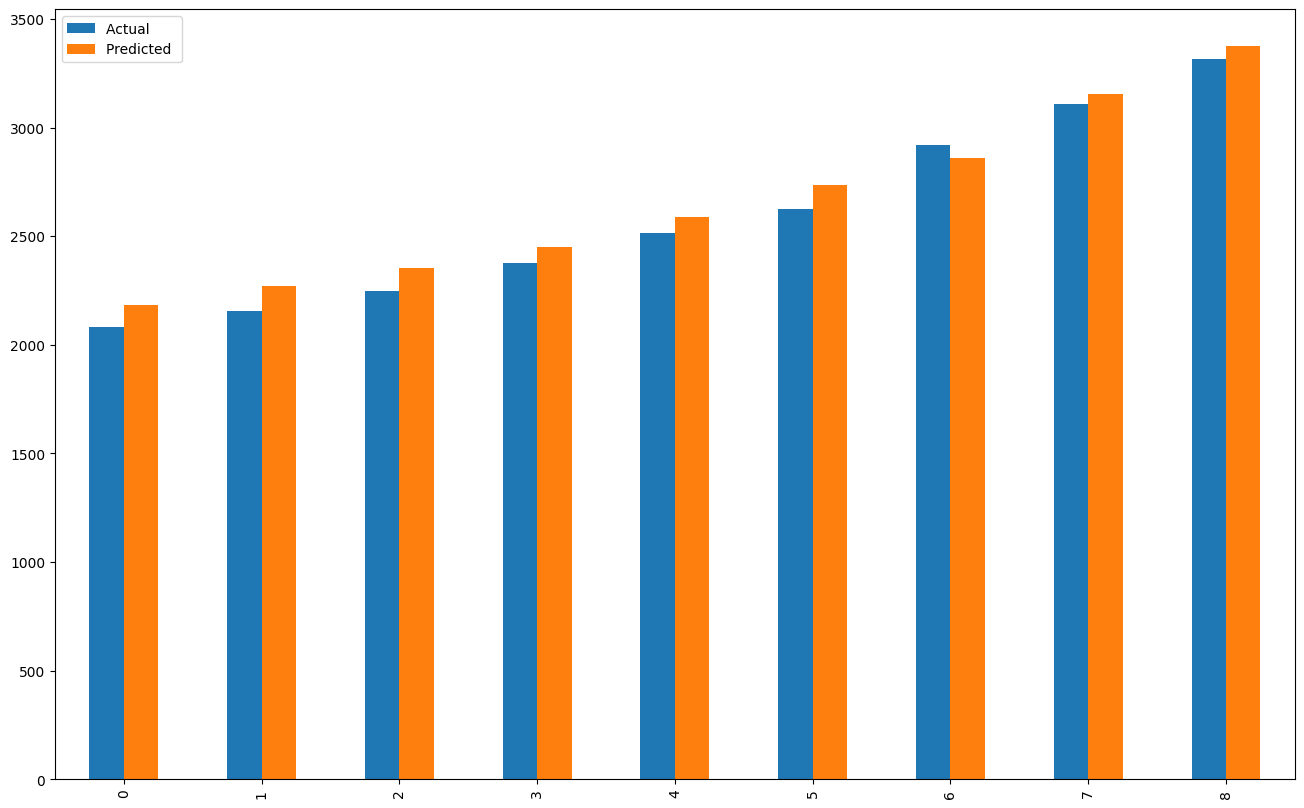

In [59]:
df_Delhi.plot(kind='bar',figsize=(16,10))

In [53]:
from sklearn.metrics import mean_squared_error

In [57]:
acc=mean_squared_error(testy,predict_value)

In [58]:
print(acc)

7462.009784658881
